# Task1: Regression

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor

# import lightgbm as lgb
# from lightgbm.sklearn import LGBMRegressor

from xgboost import XGBRegressor, plot_importance

from sklearn.linear_model import Ridge, LassoCV, HuberRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.regressor import StackingCVRegressor

import seaborn as sns


plt.style.use('fivethirtyeight')
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [44]:
train = pd.read_csv('../clean/train.csv')
test = pd.read_csv('../clean/test.csv')
train[train['density'].isna()]

,property_type,tenure,built_year,num_beds,num_baths,size_sqft,furnishing,subzone,planning_area,price,shop_dist,mrt_dist,commercials_dist,second_school_dist,primary_school_dist,density,available_unit_type_is_studio,available_unit_type_min_room,available_unit_type_max_room


In [45]:
labelEnc = preprocessing.LabelEncoder()
train.planning_area = labelEnc.fit_transform(train.planning_area)
train.subzone = labelEnc.fit_transform(train.subzone)
train.furnishing = labelEnc.fit_transform(train.furnishing)
train.tenure = labelEnc.fit_transform(train.tenure)
train.property_type = labelEnc.fit_transform(train.property_type)
train.available_unit_type_is_studio = labelEnc.fit_transform(train.available_unit_type_is_studio)

test.planning_area = labelEnc.fit_transform(test.planning_area)
test.subzone = labelEnc.fit_transform(test.subzone)
test.furnishing = labelEnc.fit_transform(test.furnishing)
test.tenure = labelEnc.fit_transform(test.tenure)
test.property_type = labelEnc.fit_transform(test.property_type)
test.available_unit_type_is_studio = labelEnc.fit_transform(test.available_unit_type_is_studio)

In [46]:
test.isnull().sum()

property_type                    0
tenure                           0
built_year                       0
num_beds                         0
num_baths                        0
size_sqft                        0
furnishing                       0
subzone                          0
planning_area                    0
shop_dist                        0
mrt_dist                         0
commercials_dist                 0
second_school_dist               0
primary_school_dist              0
density                          0
available_unit_type_is_studio    0
available_unit_type_min_room     0
available_unit_type_max_room     0
dtype: int64

In [47]:
df_X = train.drop(axis=1,columns=['price'])
df_y = train["price"]

In [48]:
df_X.isnull().sum()

property_type                    0
tenure                           0
built_year                       0
num_beds                         0
num_baths                        0
size_sqft                        0
furnishing                       0
subzone                          0
planning_area                    0
shop_dist                        0
mrt_dist                         0
commercials_dist                 0
second_school_dist               0
primary_school_dist              0
density                          0
available_unit_type_is_studio    0
available_unit_type_min_room     0
available_unit_type_max_room     0
dtype: int64

In [49]:
# Convert dataframes to numpy arrays
X, y = df_X.to_numpy(), df_y.to_numpy()
y = y.ravel().astype(int)

# Split dataset in training and test data (20% test data)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
y_train = y_train
# Normalize data using the sciki-learn StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train, X_val = scaler.transform(X_train), scaler.transform(X_val)

print('Number of features: {}'.format(X_train.shape[1]))
print('Number of samples for training: {}'.format(X_train.shape[0]))
print('Number of samples for testing: {}'.format(X_val.shape[0]))

Number of features: 18
Number of samples for training: 15955
Number of samples for testing: 3989


In [ ]:
%%time
randomForestRegressor = RandomForestRegressor().fit(X_train, y_train)
decisionTreeRegressor = DecisionTreeRegressor().fit(X_train, y_train)
adaBoostRegressor = AdaBoostRegressor().fit(X_train, y_train)
gdbtRegressor = GradientBoostingRegressor().fit(X_train, y_train)
catBoostRegressor = CatBoostRegressor().fit(X_train, y_train)

Learning rate set to 0.063422
0:	learn: 4001292.3924773	total: 3.65ms	remaining: 3.64s
1:	learn: 3850829.5524461	total: 5.79ms	remaining: 2.89s
2:	learn: 3711996.8837876	total: 10.1ms	remaining: 3.37s
3:	learn: 3578743.9558279	total: 12.6ms	remaining: 3.13s
4:	learn: 3458410.0951675	total: 14.9ms	remaining: 2.96s
5:	learn: 3345468.0644387	total: 16.8ms	remaining: 2.78s
6:	learn: 3247801.7847441	total: 19.5ms	remaining: 2.76s
7:	learn: 3154222.4084954	total: 22.2ms	remaining: 2.75s
8:	learn: 3066415.2096851	total: 24ms	remaining: 2.65s
9:	learn: 2982604.2887382	total: 26.7ms	remaining: 2.64s
10:	learn: 2906224.8069196	total: 28.7ms	remaining: 2.58s
11:	learn: 2835735.9883527	total: 31ms	remaining: 2.55s
12:	learn: 2776088.1221726	total: 34.3ms	remaining: 2.6s
13:	learn: 2717450.4086176	total: 36.3ms	remaining: 2.56s
14:	learn: 2666136.2049199	total: 38.6ms	remaining: 2.53s
15:	learn: 2615813.2423654	total: 40.8ms	remaining: 2.51s
16:	learn: 2563514.4819150	total: 43.2ms	remaining: 2.5s


175:	learn: 1398006.8035090	total: 393ms	remaining: 1.84s
176:	learn: 1396989.9485681	total: 396ms	remaining: 1.84s
177:	learn: 1395711.3092488	total: 398ms	remaining: 1.84s
178:	learn: 1393233.8805165	total: 400ms	remaining: 1.83s
179:	learn: 1391519.5576055	total: 402ms	remaining: 1.83s
180:	learn: 1388915.5928535	total: 403ms	remaining: 1.82s
181:	learn: 1387860.5733116	total: 406ms	remaining: 1.82s
182:	learn: 1387182.7570579	total: 408ms	remaining: 1.82s
183:	learn: 1386154.2158206	total: 410ms	remaining: 1.82s
184:	learn: 1381501.6502440	total: 413ms	remaining: 1.82s
185:	learn: 1376678.6690306	total: 415ms	remaining: 1.82s
186:	learn: 1375210.3203412	total: 418ms	remaining: 1.82s
187:	learn: 1373600.4506950	total: 420ms	remaining: 1.81s
188:	learn: 1372726.6780508	total: 422ms	remaining: 1.81s
189:	learn: 1370013.9252199	total: 425ms	remaining: 1.81s
190:	learn: 1367416.0716735	total: 427ms	remaining: 1.81s
191:	learn: 1365180.4817309	total: 429ms	remaining: 1.8s
192:	learn: 136

355:	learn: 1011512.7144930	total: 787ms	remaining: 1.42s
356:	learn: 1010579.6093463	total: 790ms	remaining: 1.42s
357:	learn: 1009523.7626617	total: 792ms	remaining: 1.42s
358:	learn: 1008579.3232169	total: 794ms	remaining: 1.42s
359:	learn: 1007362.6031327	total: 797ms	remaining: 1.42s
360:	learn: 1005390.6725806	total: 800ms	remaining: 1.42s
361:	learn: 1004084.6260409	total: 802ms	remaining: 1.41s
362:	learn: 1002833.5187532	total: 804ms	remaining: 1.41s
363:	learn: 1002046.8706460	total: 807ms	remaining: 1.41s
364:	learn: 1000673.2606168	total: 809ms	remaining: 1.41s
365:	learn: 999970.9543484	total: 811ms	remaining: 1.41s
366:	learn: 998313.3616828	total: 814ms	remaining: 1.4s
367:	learn: 997745.3914358	total: 816ms	remaining: 1.4s
368:	learn: 996775.9108825	total: 818ms	remaining: 1.4s
369:	learn: 993543.2809216	total: 820ms	remaining: 1.4s
370:	learn: 992769.2901301	total: 822ms	remaining: 1.39s
371:	learn: 991147.3996432	total: 825ms	remaining: 1.39s
372:	learn: 989563.084122

521:	learn: 821104.2586742	total: 1.18s	remaining: 1.08s
522:	learn: 820564.6758882	total: 1.18s	remaining: 1.08s
523:	learn: 819858.1190936	total: 1.19s	remaining: 1.08s
524:	learn: 819448.6821834	total: 1.19s	remaining: 1.07s
525:	learn: 818540.0558574	total: 1.19s	remaining: 1.07s
526:	learn: 817237.8323493	total: 1.19s	remaining: 1.07s
527:	learn: 816491.9365669	total: 1.19s	remaining: 1.07s
528:	learn: 815362.9178910	total: 1.2s	remaining: 1.06s
529:	learn: 814866.5173407	total: 1.2s	remaining: 1.06s
530:	learn: 813994.1043619	total: 1.2s	remaining: 1.06s
531:	learn: 813686.4689780	total: 1.2s	remaining: 1.06s
532:	learn: 813180.8566527	total: 1.21s	remaining: 1.05s
533:	learn: 812845.7547711	total: 1.21s	remaining: 1.05s
534:	learn: 812322.5943795	total: 1.21s	remaining: 1.05s
535:	learn: 811339.2216948	total: 1.21s	remaining: 1.05s
536:	learn: 810956.2891643	total: 1.21s	remaining: 1.04s
537:	learn: 809702.7557632	total: 1.22s	remaining: 1.04s
538:	learn: 809332.7973433	total: 1

In [ ]:

%%time
print('Root Mean Squared Errors for all regressors')
print('============================')
rlist = []

for rgs in [decisionTreeRegressor, randomForestRegressor, gdbtRegressor, catBoostRegressor]:
    try:
        # Predict for test samples
        y_pred = rgs.predict(X_val)
        # Calculate the root mean squared error and mean absolute error
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        mae = mean_absolute_error(y_val, y_pred)
        rlist.append(rmse)
    except Exception as e:
        print(e)
        # Handle exception (e.g., a classifier is still None)
        mae = '---'

    print('{} mae: {:.3} rmse: {:.3}'.format(type(rgs).__name__, mae, rmse))


In [36]:
rlist

[2168030.002655974, 1466749.6275708748, 1924176.1905884217, 1455464.5063606033]

In [79]:
%%time
X, y = df_X.to_numpy(), df_y.to_numpy()
y = y.ravel().astype(int)

# LightGBM
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2)
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
val_X = my_imputer.transform(val_X)

lgbm = lgb.LGBMRegressor(objective='regression', learning_rate=0.05, n_estimators=1000)
lgbm.fit(train_X, train_y, verbose=False)

predictions = lgbm.predict(val_X)

rmse = np.sqrt(mean_squared_error(predictions, val_y))
print("Root Mean Squared Error : " + str(rmse))
rlist.append(rmse)

Root Mean Squared Error : 8811563.407103725
CPU times: user 10.2 s, sys: 204 ms, total: 10.4 s
Wall time: 931 ms


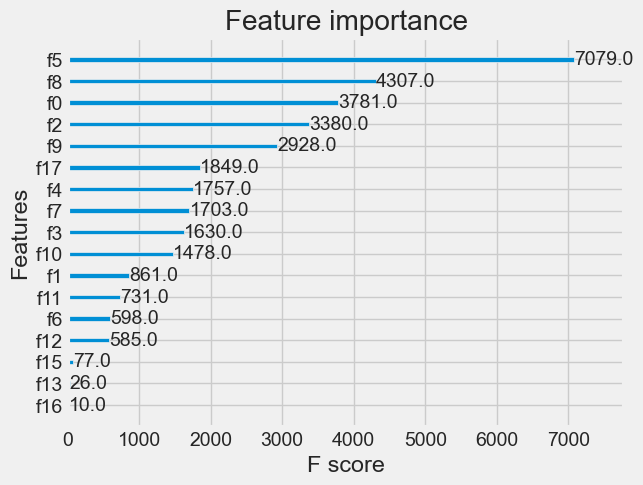

Root Mean Squared Error : 5492365.861273691
CPU times: user 1min 6s, sys: 1.46 s, total: 1min 7s
Wall time: 5.96 s


In [80]:
%%time

X, y = df_X.to_numpy(), df_y.to_numpy()
y = y.ravel().astype(int)

xgb = XGBRegressor(learning_rate=0.05, n_estimators=1000,  objective='reg:gamma')
xgb.fit(X_train, y_train)

pred = xgb.predict(X_val)

plot_importance(xgb)
plt.show()

rmse = np.sqrt(mean_squared_error(pred, val_y))
print("Root Mean Squared Error : " + str(rmse))
rlist.append(rmse)

In [81]:
%%time

stackmodel = StackingCVRegressor(regressors=(decisionTreeRegressor, randomForestRegressor, gdbtRegressor, lgbm, xgb), meta_regressor=randomForestRegressor, use_features_in_secondary=True)
rgs_stack = stackmodel.fit(X_train, y_train)
y_pred = rgs_stack.predict(X_val)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
print('{} mae: {:.3} rmse: {:.3}'.format(type(rgs_stack).__name__, mae, rmse))
rlist.append(rmse)

StackingCVRegressor mae: 3.02e+05 rmse: 1.89e+06
CPU times: user 8min 13s, sys: 9.78 s, total: 8min 23s
Wall time: 1min 54s


In [82]:
rlist

[1710243.1902198498,
 1551386.4533522185,
 2211163.743958443,
 1591022.1740315824,
 8811563.407103725,
 5492365.861273691,
 1892798.1713578098]

Text(0.5, 1.0, 'Distribution plot of RMSE')

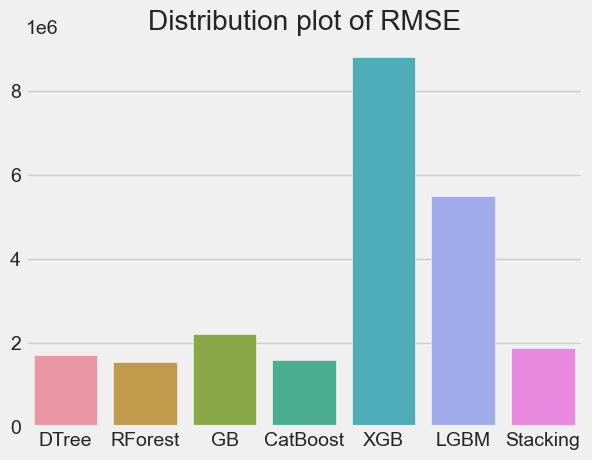

In [84]:
plt.figure()
sns.barplot(x=["DTree", "RForest", "GB","CatBoost", "XGB", "LGBM", "Stacking"], y=rlist)
plt.title("Distribution plot of RMSE")

In [85]:
%%time

param_grid = {
    'n_estimators': [20, 40, 100],
    'max_depth': [3, 10, None],
    'max_features': [12, 18, 27],
    'bootstrap': [True]
             }

rgs = RandomForestRegressor()
model = GridSearchCV(rgs, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

# Store the parameters of the best model
best_params = model.best_params_

# Predict with test data on the model with the best found parameters
y_pred = model.predict(val_X)

# Calculate the root mean squared error
best_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print('Best RandomForestRegressor: {} (RMSE: {:.3f})'.format(best_params, best_rmse))

Best RandomForestRegressor: {'bootstrap': True, 'max_depth': 10, 'max_features': 12, 'n_estimators': 20} (RMSE: 1394637678.379)
CPU times: user 4min 29s, sys: 2.53 s, total: 4min 32s
Wall time: 4min 35s


In [86]:
pd.Series(y_pred).to_csv('../prediction/1.csv',index=True,index_label=['Id','Predicted'])

In [87]:
%%time

rgs = rgs_stack
X_for_test = scaler.transform(test)
y_pred_stack = rgs.predict(X_for_test)

CPU times: user 2.36 s, sys: 222 ms, total: 2.59 s
Wall time: 357 ms


In [88]:
pd.Series(y_pred_stack).to_csv('../prediction/1.csv',index=True,index_label=['Id','Predicted'])

In [89]:
y_pred_stack

array([1065506., 1341741., 1156800., ..., 3294158.,  556565., 4117008.])

In [ ]:
# Catboost

In [37]:
%%time

X_for_test = scaler.transform(test)
y_pred_catboost = catBoostRegressor.predict(X_for_test)

ValueError: X has 18 features, but StandardScaler is expecting 19 features as input.

In [38]:
y_pred_catboost

array([1159066.61704289, 1490839.02083854, 1204418.99829528, ...,
       3334811.56150614,  577431.5207536 , 4016423.63709346])

In [39]:
pd.Series(y_pred_catboost).to_csv('../prediction/1.csv',index=True,index_label=['Id','Predicted'])